In [1]:
import json
from pprint import pprint
from IPython.display import display, HTML, IFrame
from requests import Session


# Link to FBI swagger: https://crime-data-explorer.fr.cloud.gov/proxy/swagger-ui.html#!/victim45tkm45controller/getAgencyVictimCountsUsingGET_1
# FBI website: https://crime-data-explorer.fr.cloud.gov/api


# Base url for requests: https://api.usa.gov/crime/fbi/sapi/
ROOT = 'https://api.usa.gov/crime/fbi/sapi/'
API_KEY = 'kjnpGNxo0EyroGFmuXxOEmMq84ZkylLbDCA6NrdE&location=Denver+CO'

# ORI codes: https://www.icpsr.umich.edu/files/NACJD/ORIs/16oris.html#16_ADA_(FIPS=001_UCR=000)
display(HTML("""<h3><a name="16_ADA_(FIPS=001_UCR=001)">ADA (FIPS=001 UCR=001), ID:</a></h3>
<pre>CITY/AGENCY                                               ORI7      ORI9       

ADA COUNTY SHERIFF'S OFFICE                               ID00100   ID0010000  
BOISE POLICE DEPARTMENT                                   ID00101   ID0010100  
GARDEN CITY POLICE DEPARTMENT                             ID00102   ID0010200  
KUNA PD                                                   ID00107   ID0010700  
MERIDIAN POLICE DEPARTMENT                                ID00103   ID0010300  
</pre>
<h3><a name="16_ADA_(FIPS=001_UCR=000)">ADA (FIPS=001 UCR=000), ID:</a></h3>
<pre>CITY/AGENCY                                               ORI7      ORI9       

DLE ALCOHOL BEVERAGE CONTROL DIV BOISE                    IDDLE04   IDDLE0400  
DLE BUREAU OF NARCOTICS REGION III BOISE                  IDIBN03   IDIBN0300  
IDAHO STATE POLICE                                        IDISP00   IDISP0000  
STATE POLICE MERIDIAN                                     IDISP03   IDISP0300  
</pre>"""))

In [3]:
# offense-data-controller
# GET api/data/nibrs/{offense}/offense/agencies/{ori}/{variable}

# offender-data-controller
# GET api/data/nibrs/{offense}/offender/agencies/{ori}/{variable}


# WHERE ARE ALL THE DUI'S?!?!
ada_ori9_mapping = {
    'ADA COUNTY SHERIFF\'S OFFICE': 'ID0010000',
    'BOISE POLICE DEPARTMENT': 'ID0010100',
    'GARDEN CITY POLICE DEPARTMENT': 'ID0010200',
    'KUNA PD': 'ID0010700',
    'MERIDIAN POLICE DEPARTMENT': 'ID0010300'
}


offender_endpoint = ROOT + 'api/data/nibrs/murder-and-nonnegligent-manslaughter/offender/agencies/ID0010100/count?api_key=' + API_KEY 
s = Session()
r = s.get(url=offender_endpoint).json()['results']

with open('agg_assault_data.json', 'w') as fp:
    json.dump(r, fp)




In [4]:
import pandas as pd
import matplotlib.pyplot as plt


with open('agg_assault_data.json', 'r') as fp:
    data = json.load(fp)

df = pd.json_normalize(data)
print(df)
print(df.dtypes)

    count  data_year
0       2       1993
1       5       1994
2       3       1995
3       1       1996
4       5       1997
5       2       1998
6       2       1999
7       1       2000
8       2       2001
9       6       2002
10      3       2003
11      9       2005
12      5       2006
13     12       2007
14      1       2008
15      7       2009
16      3       2010
17      1       2011
18      2       2012
19      3       2013
20      7       2014
21      1       2015
22     10       2016
23      2       2017
24      1       2018
25      6       2019
count        int64
data_year    int64
dtype: object


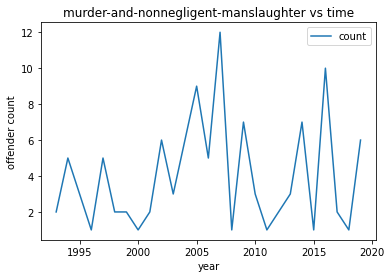

In [5]:
import matplotlib


df.plot(x='data_year', y=['count'])
# m = df.plot.scatter(x='data_year', y='male_count', color='blue')
# f = df.plot.scatter(x='data_year', y='female_count', color='grey', ax=m)
matplotlib.pyplot.ylabel('offender count')
matplotlib.pyplot.xlabel('year')
matplotlib.pyplot.title('murder-and-nonnegligent-manslaughter vs time')
plt.show()

In [6]:
# https://odn.data.socrata.com/resource/h4kz-unyt.json
# https://odn.data.socrata.com/resource/h4kz-unyt.json?$where=name in('Boise, Idaho', 'Meridian, Idaho', 'Nampa, Idaho')

import json
from pprint import pprint
import pandas as pd

with open('response.json') as f:
    data = json.load(f)
    
pprint(data)


,
  'name': 'Nampa, Idaho',
  'place_name': 'Nampa, ID',
  'type': 'place',
  'value': '262',
  'variable': 'count',
  'year': '2016'},
 {'crime_type': 'Aggravated assault',
  'id': '1600000US1656260',
  'key': '1600000US1656260--2015--Aggravated assault--count',
  'name': 'Nampa, Idaho',
  'place_name': 'Nampa, ID',
  'type': 'place',
  'value': '214',
  'variable': 'count',
  'year': '2015'},
 {'crime_type': 'Aggravated assault',
  'id': '1600000US1656260',
  'key': '1600000US1656260--2015--Aggravated assault--count',
  'name': 'Nampa, Idaho',
  'place_name': 'Nampa, ID',
  'type': 'place',
  'value': '214',
  'variable': 'count',
  'year': '2015'},
 {'crime_type': 'All Crimes',
  'id': '1600000US1656260',
  'key': '1600000US1656260--2015--All Crimes--count',
  'name': 'Nampa, Idaho',
  'place_name': 'Nampa, ID',
  'type': 'place',
  'value': '5919',
  'variable': 'count',
  'year': '2015'},
 {'crime_type': 'All Crimes',
  'id': '1600000US1656260',
  'key': '1600000US1656260--2015--A

In [7]:
df = pd.json_normalize(data)
# print(df)
df.head()


,key,id,name,type,variable,value,year,crime_type,place_name
0,1600000US1608830--2018--All Crimes--count,1600000US1608830,"Boise, Idaho",place,count,239829,2018,All Crimes,NaN
1,1600000US1608830--2018--All Crimes--rate,1600000US1608830,"Boise, Idaho",place,rate,104607.76830305543,2018,All Crimes,NaN
2,1600000US1608830--2018--Aggravated assault--rate,1600000US1608830,"Boise, Idaho",place,rate,178.83235557106406,2018,Aggravated assault,NaN
3,1600000US1608830--2018--Aggravated assault--count,1600000US1608830,"Boise, Idaho",place,count,410,2018,Aggravated assault,NaN
4,1600000US1608830--2018--Property crime--rate,1600000US1608830,"Boise, Idaho",place,rate,2018.188559091008,2018,Property crime,NaN


In [8]:
df['name'] = df['name'].astype('str')
df['year'] = df['year'].astype('int')
df['value'] = df['value'].astype('float')
print(df.dtypes)
df.head()
print(len(df.index))
# df['year'].sort_values().unique()
df['crime_type'].sort_values().unique()

key            object
id             object
name           object
type           object
variable       object
value         float64
year            int64
crime_type     object
place_name     object
dtype: object
930


array(['Aggravated assault', 'All Crimes', 'Arson', 'Burglary',
       'Forcible rape', 'Larceny', 'Motor vehicle theft',
       'Murder and nonnegligent manslaughter', 'Property crime',
       'Rape (legacy definition)', 'Rape (revised definition)', 'Robbery',
       'Violent crime'], dtype=object)

In [9]:
df.loc[df['crime_type'] == 'Murder and nonnegligent manslaughter']

,key,id,name,type,variable,value,year,crime_type,place_name
18,1600000US1608830--2018--Murder and nonnegligen...,1600000US1608830,"Boise, Idaho",place,rate,0.436176,2018,Murder and nonnegligent manslaughter,NaN
19,1600000US1608830--2018--Murder and nonnegligen...,1600000US1608830,"Boise, Idaho",place,count,1.000000,2018,Murder and nonnegligent manslaughter,NaN
24,1600000US1608830--2017--Murder and nonnegligen...,1600000US1608830,"Boise, Idaho",place,count,2.000000,2017,Murder and nonnegligent manslaughter,NaN
25,1600000US1608830--2017--Murder and nonnegligen...,1600000US1608830,"Boise, Idaho",place,rate,0.886222,2017,Murder and nonnegligent manslaughter,NaN
41,1600000US1608830--2011--Murder and nonnegligen...,1600000US1608830,"Boise, Idaho",place,rate,0.480896,2011,Murder and nonnegligent manslaughter,"Boise City, ID"
...,...,...,...,...,...,...,...,...,...
872,1600000US1656260--2015--Murder and nonnegligen...,1600000US1656260,"Nampa, Idaho",place,count,6.000000,2015,Murder and nonnegligent manslaughter,"Nampa, ID"
903,1600000US1656260--2015--Murder and nonnegligen...,1600000US1656260,"Nampa, Idaho",place,rate,6.675939,2015,Murder and nonnegligent manslaughter,"Nampa, ID"
904,1600000US1656260--2015--Murder and nonnegligen...,1600000US1656260,"Nampa, Idaho",place,rate,6.675939,2015,Murder and nonnegligent manslaughter,"Nampa, ID"
907,1600000US1656260--2016--Murder and nonnegligen...,1600000US1656260,"Nampa, Idaho",place,rate,6.555944,2016,Murder and nonnegligent manslaughter,"Nampa, ID"
